In [1]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf  # For loading audio files
from scipy.signal import find_peaks

# Function to compute autocorrelation

In [2]:
def autocorrelation(signal):
    corr = np.correlate(signal, signal, mode='full')
    return corr[len(corr)//2:]

# Function to estimate pitch using autocorrelation

In [3]:
def estimate_pitch(signal, fs):
    # Calculate autocorrelation
    autocorr_values = autocorrelation(signal)
    
    # Keep only positive values
    autocorr_values = autocorr_values[:len(autocorr_values)//2]
    
    # Find peaks in autocorrelation function
    peaks, _ = find_peaks(autocorr_values)
    
    # Remove peaks corresponding to very low frequencies
    peaks = peaks[peaks > fs / 500] 
    
    # Compute pitch period
    pitch_period = np.diff(peaks)[0] / fs
    
    # Convert pitch period to pitch frequency
    pitch_freq = 1 / pitch_period
    
    return pitch_freq, autocorr_values, peaks

# Load speech signal

In [4]:
file_path = r'C:\Users\ibnes\OneDrive\Documents\Sound Recordings\Voice.wav' # Change this to your audio file path

In [5]:
signal, sampling_rate = sf.read(file_path)
# Convert to mono if stereo
if len(signal.shape) > 1:
    signal = signal.mean(axis=1)
# Normalize the signal
signal = signal / np.max(np.abs(signal))
# Estimate pitch
pitch_freq, autocorr_values, peaks = estimate_pitch(signal, sampling_rate)

print("Estimated Pitch Frequency:", pitch_freq, "Hz")

Estimated Pitch Frequency: 461.53846153846155 Hz


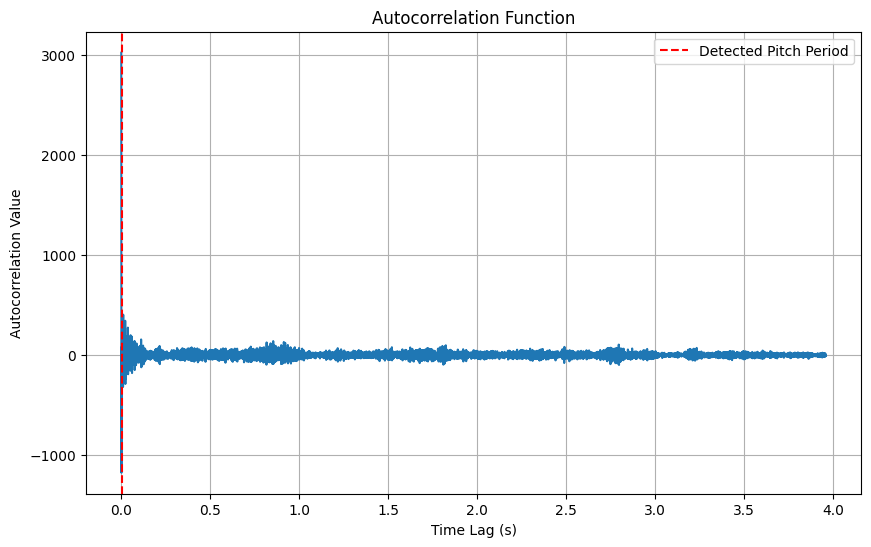

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(autocorr_values)) / sampling_rate, autocorr_values)
plt.title('Autocorrelation Function')
plt.xlabel('Time Lag (s)')
plt.ylabel('Autocorrelation Value')
plt.grid(True)
plt.axvline(x=peaks[0] / sampling_rate, color='r', linestyle='--', label='Detected Pitch Period')
plt.legend()
plt.show()